## Time Series

- ARIMA, SARIMAX
   - Auto Regression (AR)  --> pacf
   - Moving Average  (MA)  --> acf
   - Integration     (I)   --> Differencing
   

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_airline = pd.read_csv('AirPassengers.csv')
data_airline

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
## Auto Regression
 
- For examples : Sales of Onions in Jan, Feb , March and April is given based on that finding what sales willbe there in May.
    Here k = 4, also know as lags ..previous time stamps

- Feb : t-2 , March: t-1, April:t
     k = 2

## Steps for ARIMA model
        AR    I    MA
        
        p     d     q
        
      pacf         acf
      

  1) Check data for stationary
    - Hypothesis testing --> Dickey Fuller Test
       H0 --> Unit root =1 ...data is not stationary
       H1 --> unit root < 1 .. data is stationary
    
    - Dickey Fuller Test
       - P <= 0.05 --> reject null hypothesis , data is stationary
       - P > 0.05  --> accept null hypothesis , data is non stationary
    
  2) d : number of time we are Differencing 


In [3]:
data_airline.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [4]:
data_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


 - Here month should be in datetime format.

In [5]:
data_airline['Month']= pd.to_datetime(data_airline['Month'])

In [6]:
data_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [7]:
data_airline

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [8]:
data_airline.set_index('Month', inplace = True)

In [9]:
data_airline.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

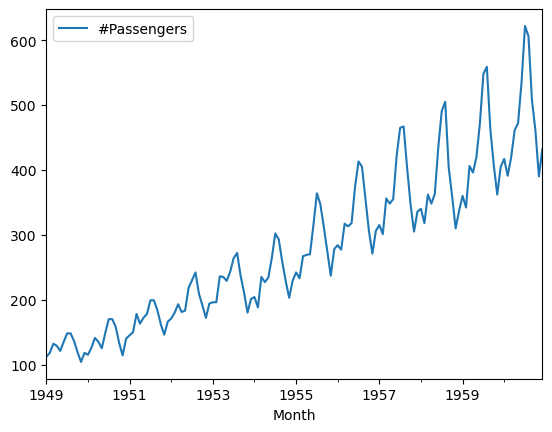

In [10]:
data_airline.plot()

- looks like a seasonal data i.e. it is not stationary.

In [11]:
from statsmodels.tsa.stattools import adfuller

In [14]:
def adf_test(series):
    result = adfuller(series)
    print('ADF statistics: {}'.format(result[0]))
    print('p - value: {}'.format(result[1]))
    
    if result[1] <= 0.05:
        print('--> Reject null hypothesis, data is stationary')
    else:
        print(' --> Accept null hypothesis, data is not stationary')

In [15]:
adf_test(data_airline['#Passengers'])

ADF statistics: 0.8153688792060463
p - value: 0.991880243437641
 --> Accept null hypothesis, data is not stationary


In [16]:
# differencing
data_airline['#Passengers 1st difference'] = data_airline['#Passengers']- data_airline['#Passengers'].shift(1)
data_airline.head()

,#Passengers,#Passengers 1st difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [18]:
adf_test(data_airline['#Passengers 1st difference'].dropna())

ADF statistics: -2.8292668241699923
p - value: 0.054213290283826474
 --> Accept null hypothesis, data is not stationary


In [19]:
# 2nd differencing
data_airline['#Passengers 2nd difference'] = data_airline['#Passengers 1st difference']- data_airline['#Passengers 1st difference'].shift(1)
data_airline.head()

,#Passengers,#Passengers 1st difference,#Passengers 2nd difference
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0


In [20]:
adf_test(data_airline['#Passengers 2nd difference'].dropna())

ADF statistics: -16.384231542468516
p - value: 2.7328918500141235e-29
--> Reject null hypothesis, data is stationary


In [21]:
# now as it seasonal data taking 12 months
# differencing
data_airline['#Passengers 12 difference'] = data_airline['#Passengers']- data_airline['#Passengers'].shift(12)
data_airline.head()

,#Passengers,#Passengers 1st difference,#Passengers 2nd difference,#Passengers 12 difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN


In [22]:
adf_test(data_airline['#Passengers 12 difference'].dropna())

ADF statistics: -3.383020726492481
p - value: 0.011551493085514952
--> Reject null hypothesis, data is stationary


In [23]:
# Now selecting p and q value
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

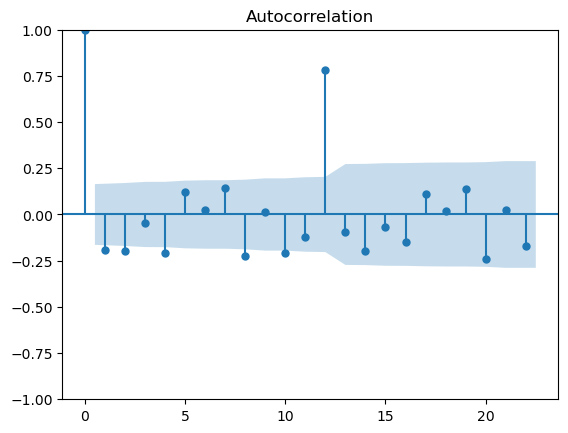

In [24]:
# MA : Moving Average
acf = plot_acf(data_airline['#Passengers 2nd difference'].dropna())

- Here q=12,13 ...seasonal trend

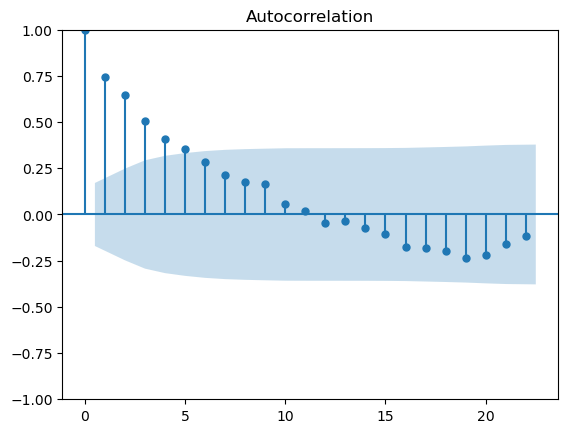

In [25]:
acf12 = plot_acf(data_airline['#Passengers 12 difference'].dropna())

- Here q= 5 as further there is no impact

C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


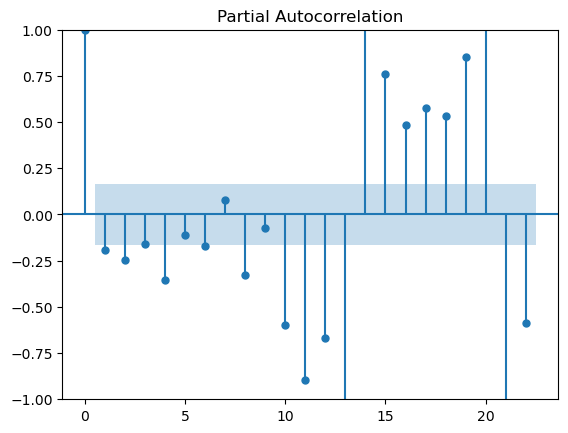

In [26]:
# AR : Auto Regression
pacf = plot_pacf(data_airline['#Passengers 2nd difference'].dropna())

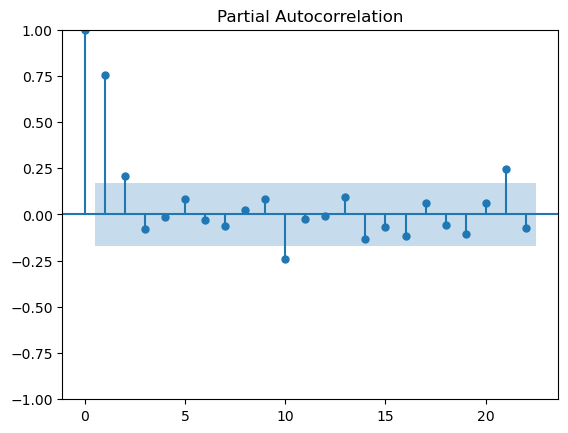

In [27]:
pacf12 = plot_pacf(data_airline['#Passengers 12 difference'].dropna())

In [28]:
data_airline

,#Passengers,#Passengers 1st difference,#Passengers 2nd difference,#Passengers 12 difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606,-16.0,-103.0,47.0
1960-09-01,508,-98.0,-82.0,45.0
1960-10-01,461,-47.0,51.0,54.0


In [29]:
# train and test data
from datetime import datetime,timedelta

train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)

In [30]:
train_data = data_airline[:train_dataset_end]
test_data = data_airline[train_dataset_end + timedelta(days=1):test_dataset_end]

In [31]:
# prediction
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [32]:
test_data

,#Passengers,#Passengers 1st difference,#Passengers 2nd difference,#Passengers 12 difference
Month,,,,
1956-01-01,284,6.0,-35.0,42.0
1956-02-01,277,-7.0,-13.0,44.0
1956-03-01,317,40.0,47.0,50.0
1956-04-01,313,-4.0,-44.0,44.0
1956-05-01,318,5.0,9.0,48.0
1956-06-01,374,56.0,51.0,59.0
1956-07-01,413,39.0,-17.0,49.0
1956-08-01,405,-8.0,-47.0,58.0
1956-09-01,355,-50.0,-42.0,43.0


In [43]:
## ARIMA

from statsmodels.tsa.arima.model import ARIMA

In [44]:
train_data

,#Passengers,#Passengers 1st difference,#Passengers 2nd difference,#Passengers 12 difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347,-17.0,-66.0,54.0
1955-09-01,312,-35.0,-18.0,53.0
1955-10-01,274,-38.0,-3.0,45.0


In [46]:
# order=(p,d,q)
model_ARIMA = ARIMA(train_data['#Passengers'],order=(10,2,0))

C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [47]:
model_ARIMA_fit = model_ARIMA.fit()

In [48]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                   84
Model:                ARIMA(10, 2, 0)   Log Likelihood                -357.239
Date:                Mon, 19 Feb 2024   AIC                            736.477
Time:                        14:06:04   BIC                            762.951
Sample:                    01-01-1949   HQIC                           747.106
                         - 12-01-1955                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5166      0.121     -4.262      0.000      -0.754      -0.279
ar.L2         -0.7204      0.121     -5.940      0.000      -0.958      -0.483
ar.L3         -0.4857      0.125     -3.876      0.000      -0.731      -0.240
ar.L4         -0.7505      0.129     -5.819      0.000      -1.003      -0.498
ar.L5         -0.5062      0.169     -2.991      0.003      -0.838      -0.175
ar.L6         -0.5200      0.141     -3.683      0.000      -0.797      -0.243
ar.L7         -0.3051      0.143     -2.127      0.033      -0.586      -0.024
ar.L8         -0.5939      0.155     -3.833      0.000      -0.898      -0.290
ar.L9         -0.2963      0.132     -2.241      0.025      -0.555      -0.037
ar.L10        -0.4825      0.110     -4.376      0.000      -0.699      -0.266
sigma2       336.0939     66.064      5.087      0.000     206.612     465.576
===================================================================================
Ljung-Box (L1) (Q):                  10.86   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.00   Prob(JB):                         0.54
Heteroskedasticity (H):               2.85   Skew:                             0.24
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
# prediction
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [50]:
pred = model_ARIMA_fit.predict(pred_start_date,pred_end_date)
residual = test_data['#Passengers']-pred

In [51]:
residual

Month
1956-01-01    -16.183615
1956-02-01    -32.478359
1956-03-01      0.556984
1956-04-01      5.172455
1956-05-01     -0.544237
1956-06-01     25.077912
1956-07-01     46.979704
1956-08-01     58.432460
1956-09-01     22.879031
1956-10-01     -1.734754
1956-11-01    -40.623913
1956-12-01    -33.828202
1957-01-01    -34.840414
1957-02-01    -55.098241
1957-03-01      5.312169
1957-04-01     -2.080468
1957-05-01     -6.157701
1957-06-01     40.783473
1957-07-01     82.680614
1957-08-01     94.147413
1957-09-01     39.889901
1957-10-01     -9.108928
1957-11-01    -66.293796
1957-12-01    -49.323607
1958-01-01    -52.077851
1958-02-01    -73.405860
1958-03-01    -26.404587
1958-04-01    -43.572866
1958-05-01    -39.448093
1958-06-01     21.744300
1958-07-01     80.146571
1958-08-01     97.329447
1958-09-01      1.513658
1958-10-01    -47.089157
1958-11-01   -108.125327
1958-12-01    -89.012392
1959-01-01    -69.205597
1959-02-01    -85.352243
1959-03-01    -22.151000
1959-04-01    -36.7

<Axes: ylabel='Density'>

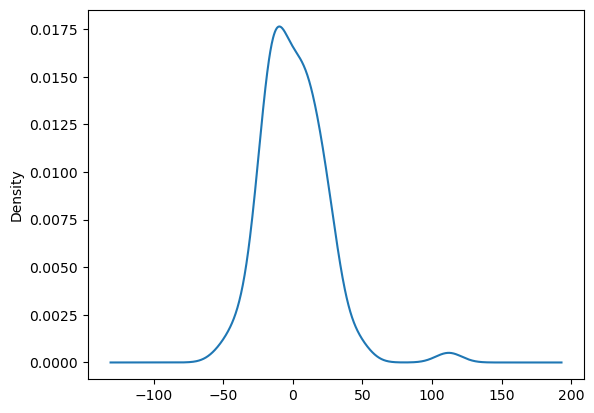

In [52]:
model_ARIMA_fit.resid.plot(kind='kde')

In [54]:
test_data['Predicted_ARIMA']=pred

C:\Users\dell\AppData\Local\Temp\ipykernel_10576\95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='Month'>

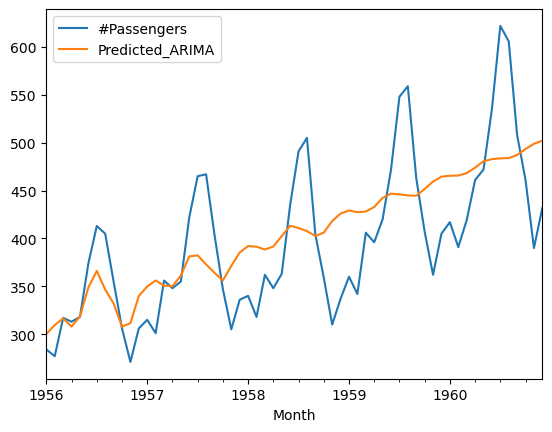

In [55]:
test_data[['#Passengers', 'Predicted_ARIMA']].plot()